___
# Atividade: <p> <center> Análise Exploratória - Variáveis Quantitativas
___

## Aula 05

**Objetivo da aula:** Ao final desta aula, o aluno deve ser capaz de elaborar análises exploratórias de variáveis quantitativas, utilizando ferramentas estatísticas e computacionais adequadas.



___
<div id="indice"></div>

## Índice

- [Empresa de TV](#empresa-de-tv)
    

- [Uso de tabelas de frequências para variáveis quantitativas](#tab-freq-quanti)
    - [Exercício 1](#ex1)


- [Criando objetos que contenham `RENDA` separada por `PLANO`](#rendaporplano)
    - [Exercício 2](#ex2)


- [Análise Exploratória - Medidas resumo](#medidasresumo)
    - [Média](#media)     
    - [Mediana](#mediana)     
    - [Quantil](#quantil)     
    - [Quartil](#quantil)     
    - [Variância e Desvio padrão](#variabilidade)     
    - [Exercício 3](#ex3)
    - [Exercício 4](#ex4)
    - [Exercício 5](#ex5)
    - [Exercício 6](#ex6)
    - [Exercício 7](#ex7)
    - [Exercício 8](#ex8)
    - [Exercício 9](#ex9)


- [Análise Exploratória - Boxplot](#boxplot)
    - [Exercício 10](#ex10)
        

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt


# Para ter melhor print
from IPython.display import display

In [2]:
# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/vitorhideki/www/python/cdados/atividades


___
<div id="empresa-de-tv"></div>

# Empresa de TV

<img src="empresaTV.jpg" height="400">

Fonte: extraído da internet

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente – (1=A ou 2=B). 
* EC: apresenta estado civil do cliente no momento da adesão ao  plano – (1=Casado, 2=Solteiro e 3=Outros).
* SATISFACAO: grau de satisfação do cliente pelo plano – 
	(Muito insatisfeito, Insatisfeito, Indiferente, Satisfeito e Muito satisfeito).
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV_Cod.xlsx` contém as variáveis descritas acima.

In [3]:
# Carregando os dados do arquivo
dados = pd.read_excel('EmpresaTV_Cod.xlsx')

In [4]:
dados['PLANO'] = dados['PLANO'].astype('category')
dados['EC'] = dados['EC'].astype('category')
dados['SATISFACAO'] = dados['SATISFACAO'].astype('category')

dados['PLANO'] = dados['PLANO'].cat.rename_categories(['A', 'B'])
dados['EC'] = dados['EC'].cat.rename_categories(['Casado', 'Solteiro', 'Outros'])
dados['SATISFACAO'] = pd.Categorical(dados.SATISFACAO, 
                                     categories = ['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 
                                                   'Satisfeito', 'Muito Satisfeito'], 
                                     ordered=True)

# Visualizando as cinco primeiras linhas
dados.head(5)

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6


[Volta ao Índice](#indice)

___
<div id="tab-freq-quanti"></div>

# Uso de tabelas de frequências para variáveis quantitativas

Na aula passada, aprendemos algumas ferramentas estatísticas que permitem explorar o comportamento de variáveis qualitativas. <br>
Hoje, nosso objetivo será analisar, numérico e graficamente, as informações descritas em variáveis quantativas. <br>
Antes, vamos ver o que acontece ao tentarmos montar uma tabela de frequências com a variável `RENDA`.

In [5]:
# TABELA DE FREQUÊNCIAS PARA UM CONTEXTO UNIVARIADO
# sintaxe:
# df.column.value_counts() # Contagem absoluta e rótulos ordenados em ordem decrescente de frequência
# df.column.value_counts(normalize=False, sort=True) # Igual o de cima

<div id="ex1"></div>

### EXERCÍCIO 1

Faça uma tabela de frequências para a variável `RENDA` usando comando adequado visto na aula anterior.

O *output* fornecido permite explorar o comportamento da renda dos clientes que fizeram adesão de algum plano de TV?

In [6]:
dados.RENDA.value_counts()

RENDA
5.3     3
4.9     3
4.7     2
13.2    2
2.5     2
       ..
11.5    1
10.8    1
8.9     1
0.7     1
0.6     1
Name: count, Length: 65, dtype: int64

[Volta ao Índice](#indice)

___
<div id="rendaporplano"></div>

# Criando objetos que contenham `RENDA` separada por `PLANO`

Ainda não consideramos a variável RENDA em nossa análise. 
Vamos explora-la para melhor compreender o perfil dos clientes dessa empresa.

Como o objetivo da empresa é entender o perfil dos clientes em cada plano, então vamos antes criar dois novos *dataframes* e duas novas *Series* conforme exercício a seguir. 

<div id="ex2"></div>

### EXERCÍCIO 2

Crie quatro objetos:

- `dados_a` contendo somente os dados dos clientes do plano A;
- `dados_b` contendo somente os dados dos clientes do plano B;
- `renda_a` contendo somente a renda dos clientes do plano A;
- `renda_b` contendo somente a renda dos clientes do plano B.

**Dica:** Use conhecimentos adquiridos nas aulas anteriores.

In [7]:
dados_a = dados.loc[dados['PLANO'] == 'A', :]
dados_a

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6
5,6,A,Outros,Satisfeito,9.8
6,7,A,Casado,Muito Satisfeito,13.5
7,8,A,Solteiro,Satisfeito,7.8
8,9,A,Casado,Satisfeito,14.4
9,10,A,Casado,Muito Satisfeito,11.2


In [8]:
dados_b = dados.loc[dados['PLANO'] == 'B', :]
dados_b

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
46,47,B,Solteiro,Insatisfeito,3.9
47,48,B,Solteiro,Insatisfeito,3.5
48,49,B,Outros,Insatisfeito,3.3
49,50,B,Solteiro,Insatisfeito,2.6
50,51,B,Solteiro,Insatisfeito,2.5
51,52,B,Casado,Insatisfeito,4.9
52,53,B,Solteiro,Indiferente,8.1
53,54,B,Solteiro,Indiferente,4.9
54,55,B,Solteiro,Indiferente,4.2
55,56,B,Solteiro,Indiferente,5.5


In [9]:
renda_a = dados_a['RENDA']

In [10]:
renda_b = dados_b['RENDA']

[Volta ao Índice](#indice)

___
<div id="medidasresumo"></div>

# Análise Exploratória - Medidas resumo

O **Pandas** oferece uma variedade de funções para calcular medidas-resumo, que fornecem *insights* valiosos sobre as características de posição e de dispersão dos dados. <br>
Aqui estão algumas dessas funções: 

<div id="media"></div>

  - [Series.mean()](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html)<br>
  Calcula a **média aritmética** dos valores em uma coluna quantitativa do *dataframe*, representando o valor médio do conjunto de dados. <br>
  A figura a seguir ilustra como um valor atípico ou uma assimetria nos dados podem distorcer a média, deslocando-a para um ponto no eixo x que não esteja alinhado com os valores mais frequentes.<br>
  <img src="figura_media.png" width=500>
  

<div id="media"></div>   

  - [Series.median()](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html)<br>
   A **mediana** é uma medida estatística que representa o valor central em um conjunto de dados ordenados. <br>
   Para calculá-la, é necessário seguir estes passos: <br>
   * Organize os dados em ordem crescente. <br>
   * Se o tamanho total de observações for ímpar, a mediana é o valor que está exatamente no meio em termos do tamanho da amostra. <br>
    <img src="figura_mediana_nimpar.png" width=200>    
    
   * Se o tamanho total de observações for par, a mediana é a média dos dois valores centrais em termos do tamanho da amostra. <br>
    <img src="figura_mediana_npar.png" width=200>   
    
   A mediana não é impactada por valores aberrantes ou assimetria nos dados. A ilustração abaixo exemplifica essa afirmação de forma clara.
   <img src="figura_mediana.png" width=500>    

<div id="quantil"></div>   

- [Series.quantile()](https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html)<br>
  Um **quantil** ou **percentil** de ordem p (0<p<100) é o valor que divide o conjunto de dados ordenado em duas partes: uma delas com p% dos menores valores e a outra com (100-p)% dos maiores valores.<br>
  Nesse contexto, a mediana também é chamada de quantil de ordem 50. <br>
  <img src="figura_quantil.png" width=500> 
  
  Já os **quartis** são medidas estatísticas que dividem um conjunto de dados ordenados em quatro partes iguais, cada uma representando 25% dos valores. São usados para avaliar a distribuição dos dados e entender como eles estão dispersos ao longo de sua escala. Existem três quartis principais: <br>
  * **Primeiro Quartil (Q1):** É o valor que deixa 25% dos dados abaixo e 75% dos dados acima quando os dados estão organizados em ordem crescente. Em outras palavras, é o valor que divide o primeiro quarto dos dados. <br>
  * **Segundo Quartil (Q2):** É equivalente à mediana. Separa 50% dos dados abaixo e 50% acima, representando o valor do meio quando os dados estão organizados em ordem. <br>
  * **Terceiro Quartil (Q3):** Deixa 75% dos dados abaixo e 25% acima quando os dados estão organizados em ordem crescente. É o valor que separa o terceiro quarto dos dados. <br>
  
   Os quartis são particularmente úteis para identificar a dispersão e a assimetria dos dados, além de ajudar a detectar a presença de valores extremos (outliers) que podem afetar as análises. A diferença entre o terceiro e o primeiro quartil é chamada de intervalo interquartil (IQR), que fornece informações sobre a dispersão dos dados em torno da mediana.<br>
   Essas características a cerca de uma variável quantitativa poderá ser visualizada em um gráfico chamado [Boxplot](#boxplot) como será discutido ao final deste notebook.
   
   <img src="figura_quartil.png" width=500> 

<div id="variabilidade"></div>   

  - [Series.var()](https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html)<br>
  A **variância** é a média das diferenças ao quadrado entre cada uma das observações e a média do conjunto. Características dessa medida: um dos problemas de usar a variância como medida de dispersão é o fato de sua unidade de medida ser a unidade de medida da variável quantitativa ao quadrado. A solução é extrair a raiz quadrada positiva da variância, já que, com isso, se volta à unidade original da variável.  <p>
  
  - [Series.std()](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html) <br>
  O **desvio padrão** é a raiz quadrada da variância. Características dessa medida: é positivo; vale zero apenas quando todos os valores dos dados são o mesmo número; o valor do desvio padrão pode crescer dramaticamente com a inclusão de um ou mais valores atípicos; e a unidade de medida é a mesma da definida na variável quantitativa. <br>
  
  A figura a seguir exemplifica o conceito de mensuração da variabilidade dos dados por meio da distância entre os valores individuais e a média, como é o caso da variância e do desvio padrão. 
  <img src="figura_variabilidade.png" width=500> 

<div id="ex3"></div>

### EXERCÍCIO 3

Imprima a média, o primeiro quartil ($Q1$), segundo quartil ou mediana ($Q2$), terceiro quartil ($Q3$) e o desvio padrão das rendas de todos os clientes e separadamente do plano A e B, separadamente. 

Interprete os resultados numéricos em termos do problema.

In [11]:
dados['RENDA'].mean()
dados['RENDA'].quantile(q=0.25)
dados['RENDA'].quantile(q=0.50)
dados['RENDA'].quantile(q=0.75)
dados['RENDA'].std()

4.62062198691041

In [12]:
renda_a.mean()
renda_a.quantile(q=0.25)
renda_a.quantile(q=0.50)
renda_a.quantile(q=0.75)
renda_a.std()

4.465567677909532

In [13]:
renda_b.mean()
renda_b.quantile(q=0.25)
renda_b.quantile(q=0.50)
renda_b.quantile(q=0.75)
renda_b.std()

3.2934374381078135

[Volta ao Índice](#indice)

<div id="ex4"></div>

### EXERCÍCIO 4

<div id="describe"></div>

Uma função bastante útil em uma análise exploratória de variável quantitativa é a `.describe()`. 

Utilize essa função `.describe()` com as rendas dos planos A e B e compare os resultados numéricos com os obtidos na célula anterior.

In [14]:
dados.RENDA.describe()

count    82.000000
mean      8.343902
std       4.620622
min       0.600000
25%       4.925000
50%       7.750000
75%      10.775000
max      21.400000
Name: RENDA, dtype: float64

In [15]:
renda_a.describe()

count    46.000000
mean     10.421739
std       4.465568
min       0.700000
25%       7.475000
50%      10.350000
75%      13.200000
max      21.400000
Name: RENDA, dtype: float64

In [16]:
renda_b.describe()

count    36.000000
mean      5.688889
std       3.293437
min       0.600000
25%       4.150000
50%       5.150000
75%       6.375000
max      19.200000
Name: RENDA, dtype: float64

[Volta ao Índice](#indice)

<div id="ex5"></div>

### EXERCÍCIO 5

Tão importante quanto saber selecionar ferramentas estatísticas adequadas para um contexto específico e saber codifica-las no Python, é a habilidade de interpretar esses resultados em relação ao problema, para uma melhor tomada de decisão.<br>
Quais hipóteses você pode formular a partir das medidas-resumo da renda dos clientes dos dois planos?

[Volta ao Índice](#indice)

<div id="ex6"></div>

### EXERCÍCIO 6

Estude a função `.groupby(by= )` [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) e utilize-a para imprimir as medidas resumo da variável quantitativa `RENDA` para cada categoria da variável `PLANO`, separadamente.


**DICAS**: Você deve usar essa função no *dataframe* completo `dados` e pode pedir as medidas-resumo a partir da função `.describe()`.

In [17]:
# O groupby separa um df com base no parâmetro passado
# Normalmente colocamos uma variável qualitativa dentro do groupby
dados.RENDA.groupby(dados.PLANO).describe()

,count,mean,std,min,25%,50%,75%,max
PLANO,,,,,,,,
A,46.0,10.421739,4.465568,0.7,7.475,10.35,13.200,21.4
B,36.0,5.688889,3.293437,0.6,4.150,5.15,6.375,19.2


[Volta ao Índice](#indice)

<div id="ex7"></div>

### EXERCÍCIO 7 
No [Exercício 1](#exe1), vimos que não faz sentido construir uma tabela de frequências na variável `RENDA` devido ao seu tipo de variável ser contínua. 

Crie uma nova coluna em `dados` chamada `FAIXA_DE_RENDA`que contenha a classificação da renda de cada cliente. Para tanto, use 3 faixas de renda, todas com amplitudes iguais. Note que essa quantidade de faixas não necessariamente é uma boa ideia, mas vamos começar com essa análise simplificada.


**DICA**: a função `pd.cut` pode ser útil para resolver este exercício. Consulte [aqui](https://pandas.pydata.org/docs/reference/api/pandas.cut.html).

In [18]:
faixa = pd.cut(dados.RENDA, 3)
faixa.cat.categories

IntervalIndex([(0.579, 7.533], (7.533, 14.467], (14.467, 21.4]], dtype='interval[float64, right]')

In [19]:
dados['FAIXA_DE_RENDA'] = pd.Categorical(dados.RENDA, categories=faixa.cat.categories, ordered=True)
dados

,CLIENTE,PLANO,EC,SATISFACAO,RENDA,FAIXA_DE_RENDA
0,1,A,Casado,Muito Satisfeito,21.4,"(14.467, 21.4]"
1,2,A,Solteiro,Muito Satisfeito,17.2,"(14.467, 21.4]"
2,3,A,Outros,Muito Satisfeito,15.6,"(14.467, 21.4]"
3,4,A,Casado,Satisfeito,10.4,"(7.533, 14.467]"
4,5,A,Solteiro,Muito Satisfeito,17.6,"(14.467, 21.4]"
...,...,...,...,...,...,...
77,78,B,Outros,Insatisfeito,4.3,"(0.579, 7.533]"
78,79,B,Solteiro,Insatisfeito,5.7,"(0.579, 7.533]"
79,80,B,Casado,Insatisfeito,4.0,"(0.579, 7.533]"
80,81,B,Outros,Insatisfeito,5.4,"(0.579, 7.533]"


[Volta ao Índice](#indice)

<div id="ex8"></div>

### EXERCÍCIO 8

A coluna SATISFACAO está com uma granularidade muito grande para algumas análises. <br>
Crie uma coluna `SENTIMENTO` no *dataframe* `dados` com as seguintes categorias:

    Não curtiu, se SATISFACAO = Insatisfeito ou Muito Insatisfeito
    Indiferente, se SATISFACAO = Indiferente
    Curtiu, se SATISFACAO = Satisfeito ou Muito Satisfeito
    
Ainda, modifique essa nova variável `SENTIMENTO` no *dataframe* `dados` como ordinal.

Agora, monte uma tabela cruzada de sentimento versus plano e faixa de renda.


In [20]:
dados['SENTIMENTO'] = dados['SATISFACAO'].cat.codes

dados.loc[dados['SATISFACAO'] < 'Indiferente', 'SENTIMENTO'] = 'Não Curtiu'
dados.loc[dados['SATISFACAO'] == 'Indiferente', 'SENTIMENTO'] = 'Indiferente'
dados.loc[dados['SATISFACAO'] > 'Indiferente', 'SENTIMENTO'] = 'Curtiu'

In [21]:
dados['SENTIMENTO'] = pd.Categorical(dados.SENTIMENTO, categories=['Não Curtiu', 'Indiferente', 'Curtiu'], ordered=True)
dados

,CLIENTE,PLANO,EC,SATISFACAO,RENDA,FAIXA_DE_RENDA,SENTIMENTO
0,1,A,Casado,Muito Satisfeito,21.4,"(14.467, 21.4]",Curtiu
1,2,A,Solteiro,Muito Satisfeito,17.2,"(14.467, 21.4]",Curtiu
2,3,A,Outros,Muito Satisfeito,15.6,"(14.467, 21.4]",Curtiu
3,4,A,Casado,Satisfeito,10.4,"(7.533, 14.467]",Curtiu
4,5,A,Solteiro,Muito Satisfeito,17.6,"(14.467, 21.4]",Curtiu
...,...,...,...,...,...,...,...
77,78,B,Outros,Insatisfeito,4.3,"(0.579, 7.533]",Não Curtiu
78,79,B,Solteiro,Insatisfeito,5.7,"(0.579, 7.533]",Não Curtiu
79,80,B,Casado,Insatisfeito,4.0,"(0.579, 7.533]",Não Curtiu
80,81,B,Outros,Insatisfeito,5.4,"(0.579, 7.533]",Não Curtiu


In [26]:
pd.crosstab([dados['SENTIMENTO'], dados['PLANO']], dados['FAIXA_DE_RENDA'])

FAIXA_DE_RENDA     (0.579, 7.533]  (7.533, 14.467]  (14.467, 21.4]
SENTIMENTO  PLANO                                                 
Não Curtiu  A                   7                0               0
            B                  17                0               0
Indiferente A                   4                3               0
            B                  11                1               0
Curtiu      A                   1               24               7
            B                   0                6               1

[Volta ao Índice](#indice)

<div id="ex9"></div>

### EXERCÍCIO 9

Por que não faria sentido montar uma tabela cruzada utilizando a variável RENDA no lugar de FAIXA_DE_RENDA?

[Volta ao Índice](#indice)

___
<div id="boxplot"></div>

# Análise Exploratória - Boxplot

O boxplot usa os quartis, os quais segmentam os dados em quatro partes iguais em termos de concentração, ou seja, deixa 25% do tamanho da amostra entre os quartis.

Esse gráfico é uma ferramenta estatística muito importante para extrair informações de **variáveis quantitativas**, além de permitir, com facilidade, cruzar variável quantitativa segmentada por rótulos (níveis) de outra variável qualitativa. 

Outra vantagem desse gráfico é que o mesmo permite identificar possíveis valores aberrantes caso haja observação com valor fora dos limites inferior ($LI$) e superior ($LS$), os quais são calculados a partir dos quartis $Q1$ e $Q3$ da seguinte forma:

 * $LI = Q1 - 1,5 * (Q3 - Q1)$
 * $LS = Q3 + 1,5 * (Q3 - Q1)$

<br>

**Valores que são considerados na construção do boxplot:**

  * A **caixa do boxplot** é formada pelos quartis $Q1$ e $Q3$ e dentro é colocada uma linha de acordo com o valor obtido para a mediana ($Q2$).
  * A **haste inferior** representa o menor valor numérico contido no conjunto de dados desde que esse seja maior que o limite inferior ($LI$). Caso haja valores no conjunto de dados menores do que o $LI$, esses devem ser identificados como *outliers* no gráfico.
  * A **haste superior** representa o maior valor numérico contido no conjunto de dados desde que esse seja menor que o limite superior ($LS$). Caso haja valores no conjunto de dados maiores do que o $LS$, esses devem ser identificados como *outliers* no gráfico.


Para consultar uso de cores na edição de um boxplot, consulte [link1](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) e [link2](https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color), por exemplo.

<br>

A seguir, apresentamos o comando para gerar o **BOXPLOT** a partir do *matplotlib*. <br>
Aproveite para entender o uso do comando `plt.subplot(linhas,colunas,posição)` útil para visualização da análise exploratória dos dados.

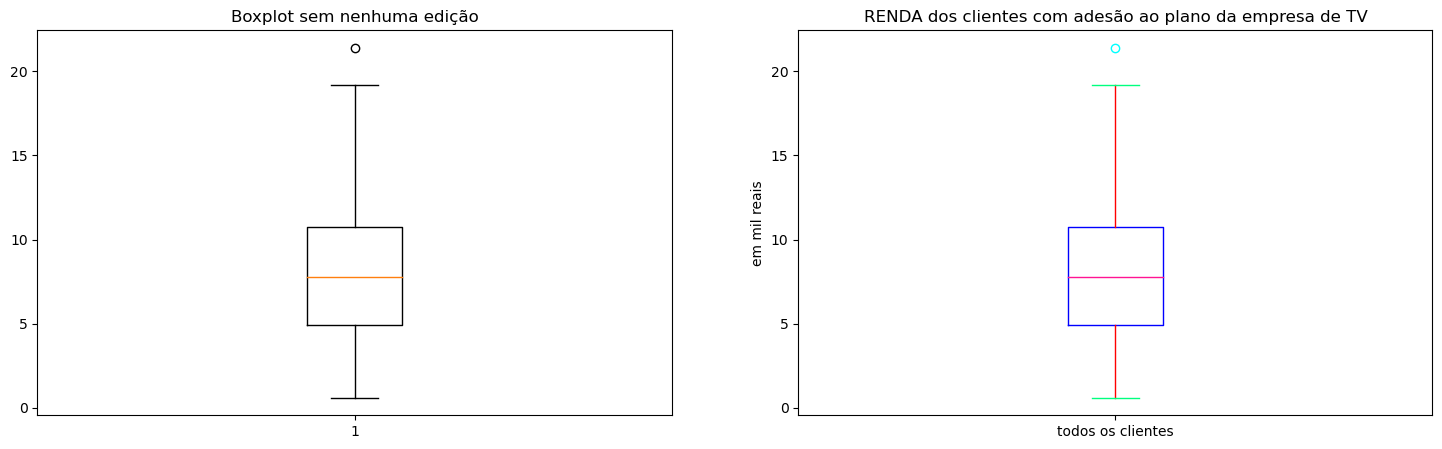

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.boxplot(dados.RENDA)
plt.title('Boxplot sem nenhuma edição')

plt.subplot(1,2,2)
plt.boxplot(dados.RENDA, labels = ['todos os clientes'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('RENDA dos clientes com adesão ao plano da empresa de TV')
plt.ylabel('em mil reais')

plt.show()

[Volta ao Índice](#indice)

<div id="ex10"></div>

### EXERCÍCIO 10

Estude o comportamento da variável quantitativa `RENDA` segmentado por `PLANO` utilizando a ferramenta gráfica Boxplot.

Faça de duas formas diferentes:
  1. Construção dos boxplots da renda para cada plano em gráficos separados. Aqui, podem usar o comando `plt.subplot()` para organizar o *output*.
  1. Construção de um único gráfico (apenas um eixo y) contendo os dois boxplots da renda para cada plano.
  1. Discuta prols e contras de cada caso.

In [23]:
#ESCREVA SUA RESPOSTA AQUI

[Volta ao Índice](#indice)